In [1]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement
# Website 
# Depoly

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('movies.csv')
df1 = pd.read_csv('credits.csv')

In [4]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
df1.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [6]:
df1.columns = ['id', 'title', 'cast', 'crew']
df1= df1.merge(df,on='id')

In [7]:
df1.head(1)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [8]:
df1.to_csv('data_movies.csv', index=False)


In [9]:
df2 = pd.read_csv('data_movies.csv')

In [10]:
df2.head(1)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [11]:
df2['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

In [12]:
df2.drop(columns=['budget','homepage','original_language','production_countries','production_companies','revenue','runtime','spoken_languages','status','tagline','title_y','title_x'], inplace=True) # drop unnecessary columns

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4803 non-null   int64  
 1   cast            4803 non-null   object 
 2   crew            4803 non-null   object 
 3   genres          4803 non-null   object 
 4   keywords        4803 non-null   object 
 5   original_title  4803 non-null   object 
 6   overview        4800 non-null   object 
 7   popularity      4803 non-null   float64
 8   release_date    4802 non-null   object 
 9   vote_average    4803 non-null   float64
 10  vote_count      4803 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 412.9+ KB


In [14]:
df2.duplicated().sum() ## no duplicate find

np.int64(0)

In [15]:
#A Weighted Rating (WR) is a technique often used in recommendation systems to balance user ratings with popularity. A common formula for calculating WR is based on the Bayesian average and accounts for the number of votes a movie has received and its average rating.
#Formula for Weighted Rating (IMDB-style):
#
#   Weighted Rating (WR) = (v/(v+m)) * R + (m/(v+m)) * C

#Where:

#    R: Average rating for the movie.
#    v: Number of votes for the movie.
 #   m: Minimum number of votes required to be listed in the chart (threshold).
  #  C: Mean of all average ratings in the dataset

## By chatgpt data
def weighted_rating(x, m, C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)



In [16]:
df2.head(5)   

,id,cast,crew,genres,keywords,original_title,overview,popularity,release_date,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,6.9,4500
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,6.3,4466
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,7.6,9106
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,6.1,2124


In [17]:
df2.describe()

,id,popularity,vote_average,vote_count
count,4803.000000,4803.000000,4803.000000,4803.000000
mean,57165.484281,21.492301,6.092172,690.217989
std,88694.614033,31.816650,1.194612,1234.585891
min,5.000000,0.000000,0.000000,0.000000
25%,9014.500000,4.668070,5.600000,54.000000
50%,14629.000000,12.921594,6.200000,235.000000
75%,58610.500000,28.313505,6.800000,737.000000
max,459488.000000,875.581305,10.000000,13752.000000


In [18]:
m= df2['vote_count'].quantile(0.9)
c= df2['vote_average'].mean()
print(m, c)


1838.4000000000015 6.092171559442016


In [19]:
filter_movies = df2.copy().loc[df2['vote_count'] >= m]
filter_movies.shape



(481, 11)

In [20]:
filter_movies['score'] = filter_movies.apply(lambda x: weighted_rating(x, m=m, C=c), axis=1)

In [21]:
filter_movies.head(1)

,id,cast,crew,genres,keywords,original_title,overview,popularity,release_date,vote_average,vote_count,score
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,7.2,11800,7.050669


In [22]:
filter_movies['score'].notnull().sum()

np.int64(481)

In [23]:
filter_movies = filter_movies.sort_values('score', ascending=False)

In [24]:
filter_movies[['original_title', 'vote_count', 'vote_average', 'score']].tail(10)

,original_title,vote_count,vote_average,score
215,4: Rise of the Silver Surfer,2589,5.4,5.687412
148,Ghostbusters,2142,5.3,5.665875
166,G.I. Joe: Retaliation,3025,5.4,5.661646
61,Jupiter Ascending,2768,5.2,5.556063
1154,Fifty Shades of Grey,3254,5.2,5.522082
41,Green Lantern,2487,5.1,5.521697
337,A Good Day to Die Hard,3493,5.2,5.507643
193,After Earth,2532,5.0,5.459420
91,Independence Day: Resurgence,2491,4.9,5.406234
242,Fantastic Four,2278,4.4,5.155730


In [25]:
import matplotlib.pyplot as plt


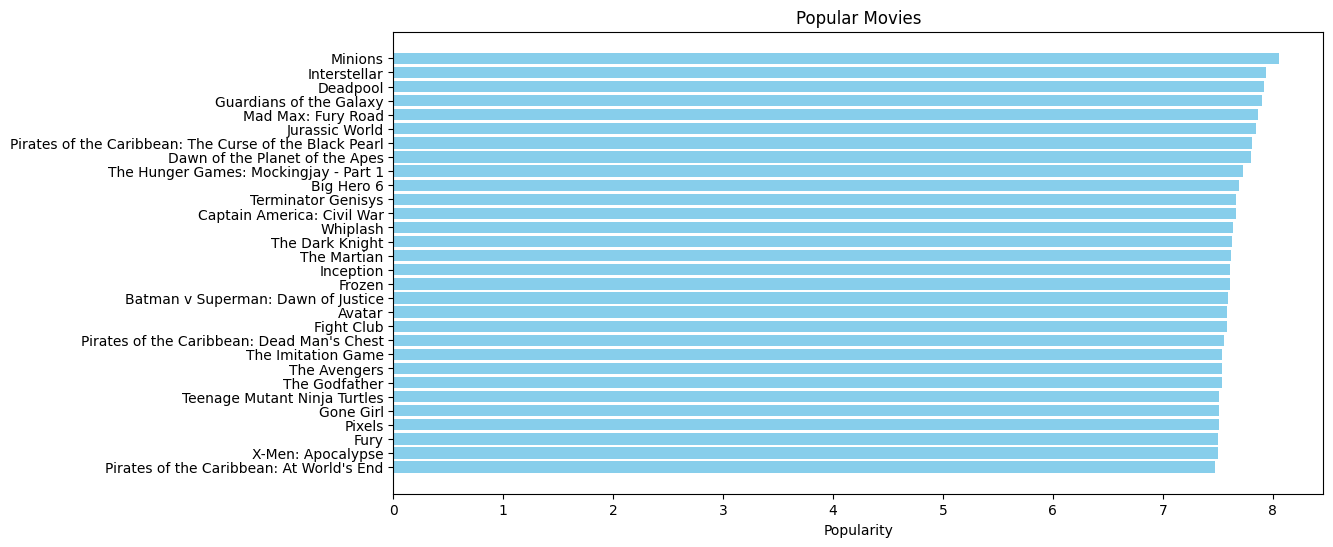

In [26]:
pop= df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,6))
plt.barh(pop['original_title'].head(30), filter_movies['score'].head(30), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

In [27]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df2['overview'] = df2['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [122]:
# it means 20000+ words in the overview 4803 movie column

In [123]:
#similarity = cos(Q) = (A.B)/(||A||.||B||)

In [124]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [125]:
df2['overview'] = df2['overview'].str.lower()

In [126]:
df2['original_title'].duplicated().sum()
df2['original_title'] = df2['original_title'].str.lower()

In [127]:
indices = pd.Series(df2.index, index=df2['original_title']).drop_duplicates()


In [128]:
# movie_title = 'highway'
# overview_tets = df.loc[df2['original_title'] == movie_title, 'overview'].values[0]

# this is only for testing


In [129]:
################################


In [130]:
def get_recommendations(title,cosine_sim):
    title = title.strip().lower()
    

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['original_title'].iloc[movie_indices]

In [131]:
get_recommendations('firewall',cosine_sim)

4146                        highway
1049                  patriot games
4061    jack brooks: monster slayer
1276               a thousand words
3663                     henry & me
1446               the tree of life
4313                     below zero
403                last action hero
4717           your sister's sister
284                  little fockers
Name: original_title, dtype: object